In [2]:
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

plt.style.use('default')
plt.style.use('dark_background')

In [237]:
posts = pd.read_csv('reposts.csv')

posts.shape

(114495, 52)

In [238]:
posts.head(5)

,input.hashtag,input.max_id,data.hashtag.edge_hashtag_to_media.edges.node.comments_disabled,data.hashtag.edge_hashtag_to_media.edges.node.__typename,data.hashtag.edge_hashtag_to_media.edges.node.id,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_caption.edges[0].node.text,data.hashtag.edge_hashtag_to_media.edges.node.shortcode,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_comment.count,data.hashtag.edge_hashtag_to_media.edges.node.taken_at_timestamp,data.hashtag.edge_hashtag_to_media.edges.node.dimensions.height,data.hashtag.edge_hashtag_to_media.edges.node.dimensions.width,data.hashtag.edge_hashtag_to_media.edges.node.display_url,data.hashtag.edge_hashtag_to_media.edges.node.edge_liked_by.count,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_preview_like.count,data.hashtag.edge_hashtag_to_media.edges.node.owner.id,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_src,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_resources[0].src,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_resources[0].config_width,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_resources[0].config_height,data.hashtag.edge_hashtag_to_media.edges.node.is_video,data.hashtag.edge_hashtag_to_media.edges.node.video_view_count,data.hashtag.edge_hashtag_to_media.edges.node.accessibility_caption,data.hashtag.edge_hashtag_to_media.count,data.hashtag.edge_hashtag_to_media.page_info.has_next_page,data.hashtag.edge_hashtag_to_media.page_info.end_cursor,data.hashtag.id,data.hashtag.name,data.hashtag.allow_following,data.hashtag.is_following,data.hashtag.is_top_media_only,data.hashtag.profile_pic_url,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.__typename,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.id,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_media_to_caption.edges[0].node.text,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.shortcode,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_media_to_comment.count,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.taken_at_timestamp,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.dimensions.height,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.dimensions.width,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.display_url,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_liked_by.count,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_media_preview_like.count,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.owner.id,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_src,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].src,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].config_width,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].config_height,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.is_video,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.accessibility_caption,data.hashtag.edge_hashtag_to_content_advisory.count,status,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.video_view_count
0,repost,NaN,False,GraphVideo,2171372605236795240,Bonita tarde\n\nCabina con tecnologia abanza...,B4iQ-FKJ1do,0,1573067931,640,640,https://scontent-lga3-1.cdninstagram.com/vp/4f...,0,0,6917874885,https://scontent-lga3-1.cdninstagram.com/vp/4f...,https://scontent-lga3-1.cdninstagram.com/vp/55...,150,150,True,0.0,NaN,434579853,True,QVFDTjFPYmZrWnVKeGd1dDJUVG5peGstblYtTTdnYk8xSm...,17843788588015920,repost,False,False,False,https://scontent-lga3-1.cdninstagram.com/vp/9e...,GraphImage,2171359039841496429,❤\nDejame un ❤ si te encanto \nPlato saludable...,B4iN4rZle1t,1,1573066190,1080,1080,https://scontent-lga3-1.cdninstagram.com/vp/89...,149,149,8483460831,https://scontent-lga3-1.cdninstagram.com/vp/45...,https://scontent-lga3-1.cdninstagram.com/vp/27...,150,150,False,Image may contain: text,0,ok,NaN
1,repost,NaN,False,GraphImage,2171373636672378103,#Repost @mnmhandmade with @get_repost\n・・・\nHa

In [239]:
posts['data.hashtag.edge_hashtag_to_media.edges.node.owner.id'].value_counts().head(10)

6088657196     823
9488335871     273
1817658875     188
23789297698    179
2011761738     160
3710465391     153
3413214662     118
13125172477    116
2229958607     110
3262905445     104
Name: data.hashtag.edge_hashtag_to_media.edges.node.owner.id, dtype: int64

In [263]:
def get_post_url(owner_id):
    return 'https://www.instagram.com/p/' + \
        posts.loc[
            posts['data.hashtag.edge_hashtag_to_media.edges.node.owner.id'] == owner_id] \
            ['data.hashtag.edge_hashtag_to_media.edges.node.shortcode'] \
        .head(1) \
        .values[0]

get_post_url(6088657196)

'https://www.instagram.com/p/B4iAqXiBSAw'

In [250]:
CAPTION_COLUMN_NAME = 'data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_caption.edges[0].node.text'

mention_counts = {}

caption_posts = posts.dropna(subset=[CAPTION_COLUMN_NAME])

for i in caption_posts.index:
    post = caption_posts.loc[i]
    caption = post[CAPTION_COLUMN_NAME]
    
    mentions = re.findall(r"@([a-zA-Z0-9_\.]+)", caption)
    
    for mention in mentions:
        if len(mention) == 1:
            continue

        mention = mention.lower()

        if mention not in mention_counts:
            mention_counts[mention] = 0
        mention_counts[mention] += 1

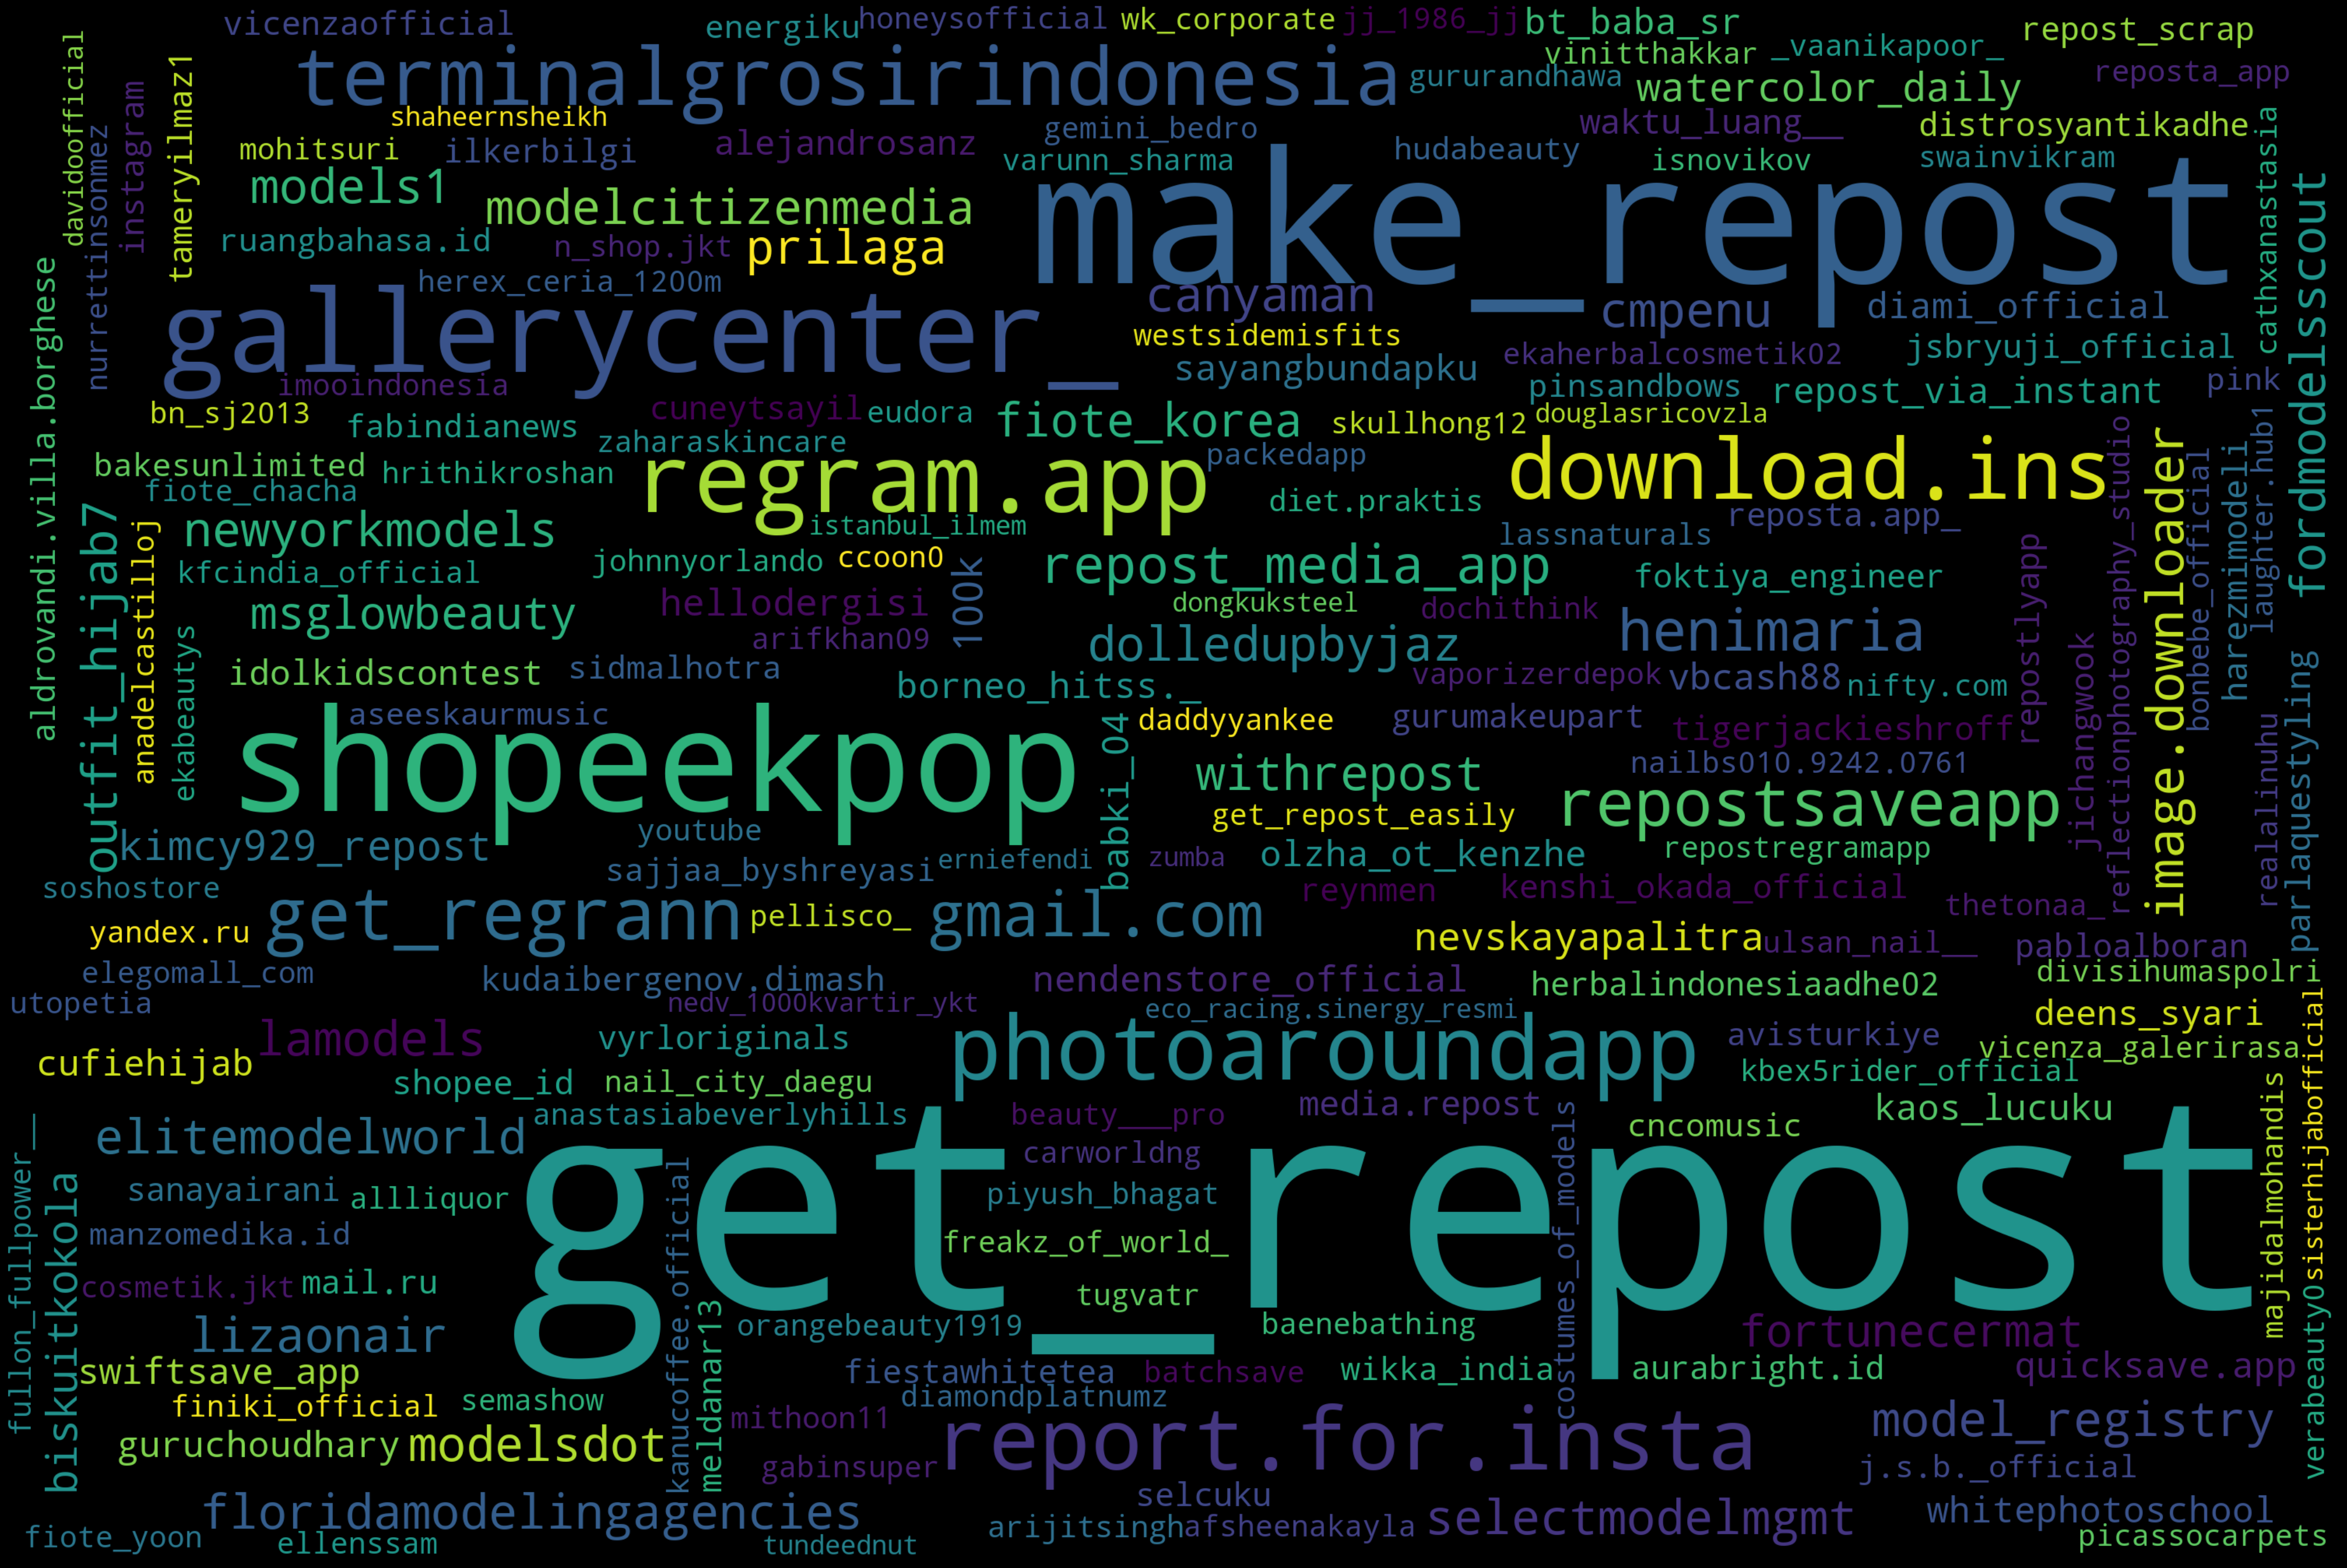

In [251]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(mention_counts)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [252]:
TOP_COUNT = 200

top_mentioned = sorted(mention_counts, key=mention_counts.get, reverse=True)[:TOP_COUNT]
top_mentioned[:20]

['get_repost',
 'make_repost',
 'shopeekpop',
 'gallerycenter_',
 'regram.app',
 'photoaroundapp',
 'report.for.insta',
 'download.ins',
 'terminalgrosirindonesia',
 'get_regrann',
 'repostsaveapp',
 'gmail.com',
 'henimaria',
 'repost_media_app',
 'image.downloader',
 'withrepost',
 'canyaman',
 'elitemodelworld',
 'modelsdot',
 'dolledupbyjaz']

In [255]:
def mention_df(mention):
    return caption_posts \
        .loc[caption_posts[CAPTION_COLUMN_NAME] \
        .apply(lambda c: '@{}'.format(mention) in c.lower())]

mention_df('get_repost').head(5)[CAPTION_COLUMN_NAME]

1     #Repost @mnmhandmade with @get_repost\n・・・\nHa...
8     #Repost @aibekmukhametalyev with @get_repost\n...
13    #Repost @millionaire_dayz (@get_repost)\n・・・\n...
20    #Repost @argeniscarruyo (@get_repost)\n・・・\nHe...
22    #Repost @joshwoodcolour with @get_repost\n・・・\...
Name: data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_caption.edges[0].node.text, dtype: object

In [254]:
mention_df('shopeekpop').head(5)[CAPTION_COLUMN_NAME]

2729    #Repost @shopeekpop\n• • • • • •\nMimin-nim ma...
2780    #Repost @shopeekpop\n• • • • • •\nMimin-nim ma...
2802    #Repost @shopeekpop\n• • • • • •\nMimin-nim ma...
2828    #Repost @shopeekpop\n• • • • • •\nMimin-nim ma...
2860    #Repost @shopeekpop\n• • • • • •\nMimin-nim ma...
Name: data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_caption.edges[0].node.text, dtype: object

In [256]:
dct = {}
mention_reposts_per_user = {}

for mention in top_mentioned:
    mentions = mention_df(mention)
    mention_count = mentions.shape[0]
    unique_reposters_count = \
        mentions['data.hashtag.edge_hashtag_to_media.edges.node.owner.id'] \
        .nunique()
    mention_reposts_per_user[mention] = mention_count / unique_reposters_count
    dct[mention] = [unique_reposters_count, mention_count / unique_reposters_count]


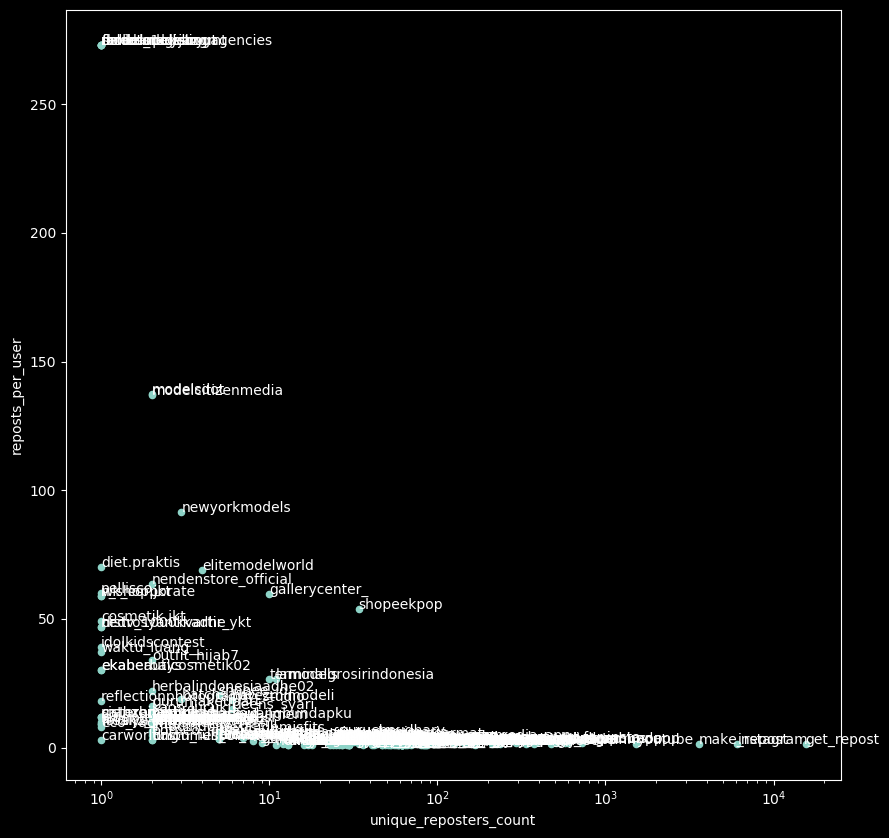

In [257]:
suspects = pd.DataFrame.from_dict(
    dct,
    orient='index',
    columns=['unique_reposters_count', 'reposts_per_user'],
)

fig = plt.figure()
ax = plt.gca()
suspects.plot(
    ax=ax,
    kind='scatter',
    x='unique_reposters_count',
    y='reposts_per_user',
    figsize=(10, 10))

ax.set_xscale('log')

for k, v in suspects.iterrows():
    ax.annotate(k, v)

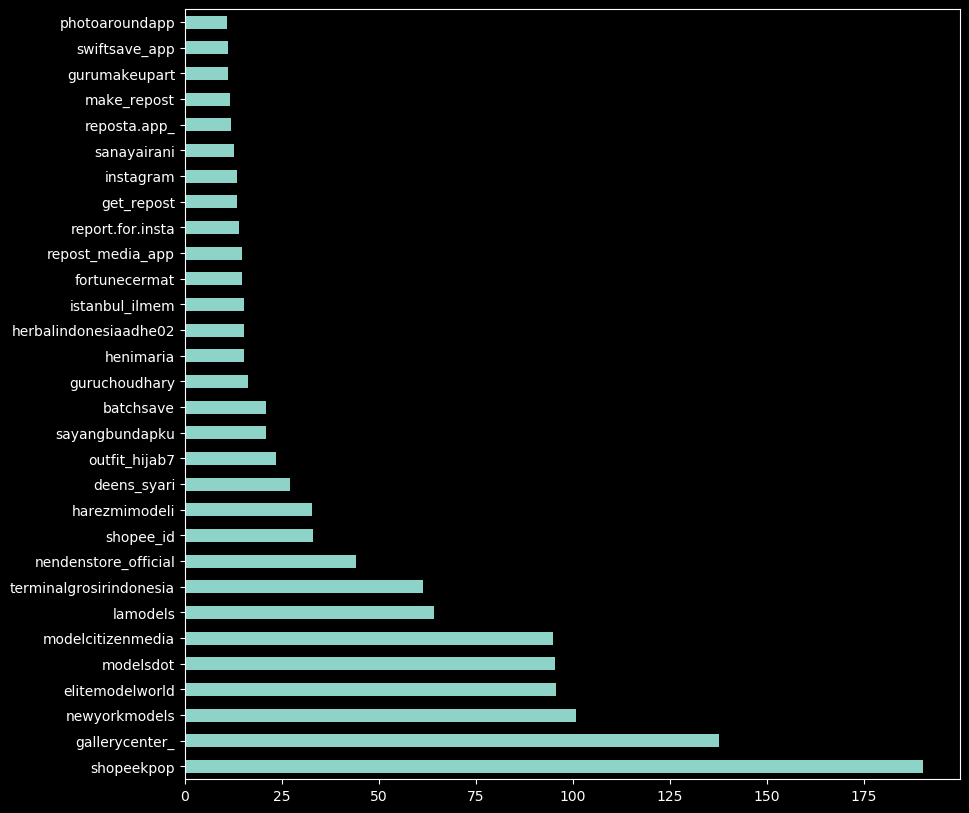

In [258]:
suspects['suspect_score'] = suspects['reposts_per_user'] \
    * np.log(suspects['unique_reposters_count'])

suspects.sort_values(by=['suspect_score'], ascending=False) \
    .head(30)['suspect_score'].plot(kind='barh', figsize=(10, 10))

In [259]:
suspects.sort_values(by=['suspect_score'], ascending=False).head(20)

,unique_reposters_count,reposts_per_user,suspect_score
shopeekpop,34,53.941176,190.216035
gallerycenter_,10,59.800000,137.694589
newyorkmodels,3,91.666667,100.706126
elitemodelworld,4,69.000000,95.654311
modelsdot,2,137.500000,95.307737
modelcitizenmedia,2,137.000000,94.961164
lamodels,11,26.727273,64.089201
terminalgrosirindonesia,10,26.700000,61.479022
nendenstore_official,2,63.500000,44.014846
shopee_id,5,20.600000,33.154421


In [278]:
LOOKUP_TARGET_USERNAME = 'shopee_id'

mention_df(LOOKUP_TARGET_USERNAME)['data.hashtag.edge_hashtag_to_media.edges.node.owner.id'] \
    .drop_duplicates() \
    .apply(get_post_url)

53498    https://www.instagram.com/p/B4hwFTQAv6x
58730    https://www.instagram.com/p/B4htVc4g_c9
87153    https://www.instagram.com/p/B4hdkzmlIOj
93401    https://www.instagram.com/p/B4hZCoQAzsz
97882    https://www.instagram.com/p/B4hVtPOHnDN
Name: data.hashtag.edge_hashtag_to_media.edges.node.owner.id, dtype: object